<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio NLP + Sist. Recomendación


En este laboratorio, tabrajaras con datos de reseñas de productos para construir un sistema de recomendación que utilice procesamiento de lenguaje natural (NLP) y *machine learning*. El objetivo principal es que analices el contenido textual de las reseñas, clasifiques las opiniones en categorías (positiva, negativa o neutra) y aproveches esta información para personalizar las recomendaciones. El sistema priorizará los productos con mejores reseñas para usuarios específicos y permitirá evaluar si el análisis de sentimientos mejora la calidad de las recomendaciones. Tareas propuestas:


**Caso 1: Crear un sistema de recomendación**: Debes generar un sistema de recomendación para priorizar productos con las reseñas para cada usuario. Los pasos que deberás seguir son:    

- Estructurar el conjunto de datos

- Sistema basado en contenido


**Caso 2: Clasificar reseñas en positivas, negativas o neutras** Deberás implementar un modelo para analizar las reseñas textuales y clasificarlas en tres categorías:

- Positivas: Si el sentimiento de la reseña es favorable.

- Negativas: Si el sentimiento de la reseña es desfavorable.

- Neutras: Si la reseña no tiene un sentimiento claro.
	
- Pasos :
	- Preprocesamiento de texto: Limpiar las reseñas eliminando caracteres especiales, palabras vacías (stopwords) y realizar lematización.
	
	- Identificar las reseñas positivas, negativas y neutrales. 


Los datos los tendréis en el [siguiente enlace](https://drive.google.com/drive/u/0/folders/1vK5zESy9KElRhm_utg_lHHXuUArrwWgu) con la descipción de cada una de las columnas.  

____________________________________

### **1. Sistema de recomendación basado en contenido**

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

import sys
sys.path.append("/")

from src import soporte_nlp as sn
from src import soporte_sistemas_recomendacion as ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv("datos/datos.csv", index_col=[0])
df.head(2)

,reviewId,reviewDate,mainDepartment,subDepartment,productName,reviewTitle,reviewStar,reviewText,inconsistentStatus
65115,RXDM4W1ZL7L4L,"Reviewed in the United States on June 22, 2021",Sports and Outdoors,Outdoor Recreation,Doctor Developed Copper Wrist Brace / Carpal T...,One size does not fit all.,3.0,Nice lightweight brace but unfortunately was t...,1
56720,R2GINAKQJOSWEL,"Reviewed in the United States on August 27, 2021",Computers,Men's Clothing,Fruit of the Loom Men's Coolzone Boxer Briefs,They were ok but thats it,4.0,Boxers were ok. The color did start to fade pr...,0


In [4]:
df.shape

(10000, 9)

Comprobamos si hay nulos en las columnas de productName y reviewText, de haberlos las eliminamos:

In [5]:
df.isna().sum()

reviewId              0
reviewDate            0
mainDepartment        0
subDepartment         0
productName           0
reviewTitle           5
reviewStar            0
reviewText            1
inconsistentStatus    0
dtype: int64

In [6]:
df.dropna(subset=["reviewText"], inplace=True)

Comprobamos si hay productos duplicados:

In [7]:
df["productName"].duplicated().sum()

np.int64(9900)

Nos quedamos con las columnas que nos interesan que son `productName`, a través de la cual vamos a hacer un group by, y `reviewText` las cuales vamos a agrupas en base al productName.

In [8]:
df_simple = df[["productName", "reviewText"]]
df_grouped = df_simple.groupby("productName").sum().reset_index()

Vamos a limpiar la columna de `reviewText` antes de vectorizarla:

In [9]:
exploracion = sn.ExploracionText(df_grouped, "reviewText", "productName")

In [10]:
df_res = exploracion.limpiar_textos("reviewText_limpia")
df_limpio = df_res[["productName", "reviewText_limpia"]].reset_index(drop=True)
print(df_limpio.shape)
df_limpio.head()

Limpiando el texto...
Texto limpiado y listo.
(99, 2)


,productName,reviewText_limpia
0,"(Refurbished) Apple iPhone 7, 32GB, Black - Fu...",admit skeptical review decide purchase anyway ...
1,AIMEILI Gel Nail Polish No Wipe Top and Base C...,thick work good get use itthese base top coat ...
2,AKASO EK7000 4K30FPS Action Camera Ultra HD Un...,impressed image quality also app suggest use p...
3,"ASUS Laptop L210 Ultra Thin Laptop, 11.6” HD D...",laptop arrive time school work greatproduct de...
4,"Acer Aspire 5 A515-46-R14K Slim Laptop | 15.6""...",buy school work good farsleekit alrighti buy l...


Realizamos la vectorización, es decir, convertimos el texto a vectores y así poder calcular las distancias entre distintos productos.


In [11]:
repre = sn.RepresentacionTexto(df_limpio, "reviewText_limpia")
similarity = repre.distancias_labels("productName")

Ahora ya podremos realizar una recomendación de productos parecidos en base a uno dado:

Ejemplo: Coleman Cooler Quad Portable Camping Chair, Blue

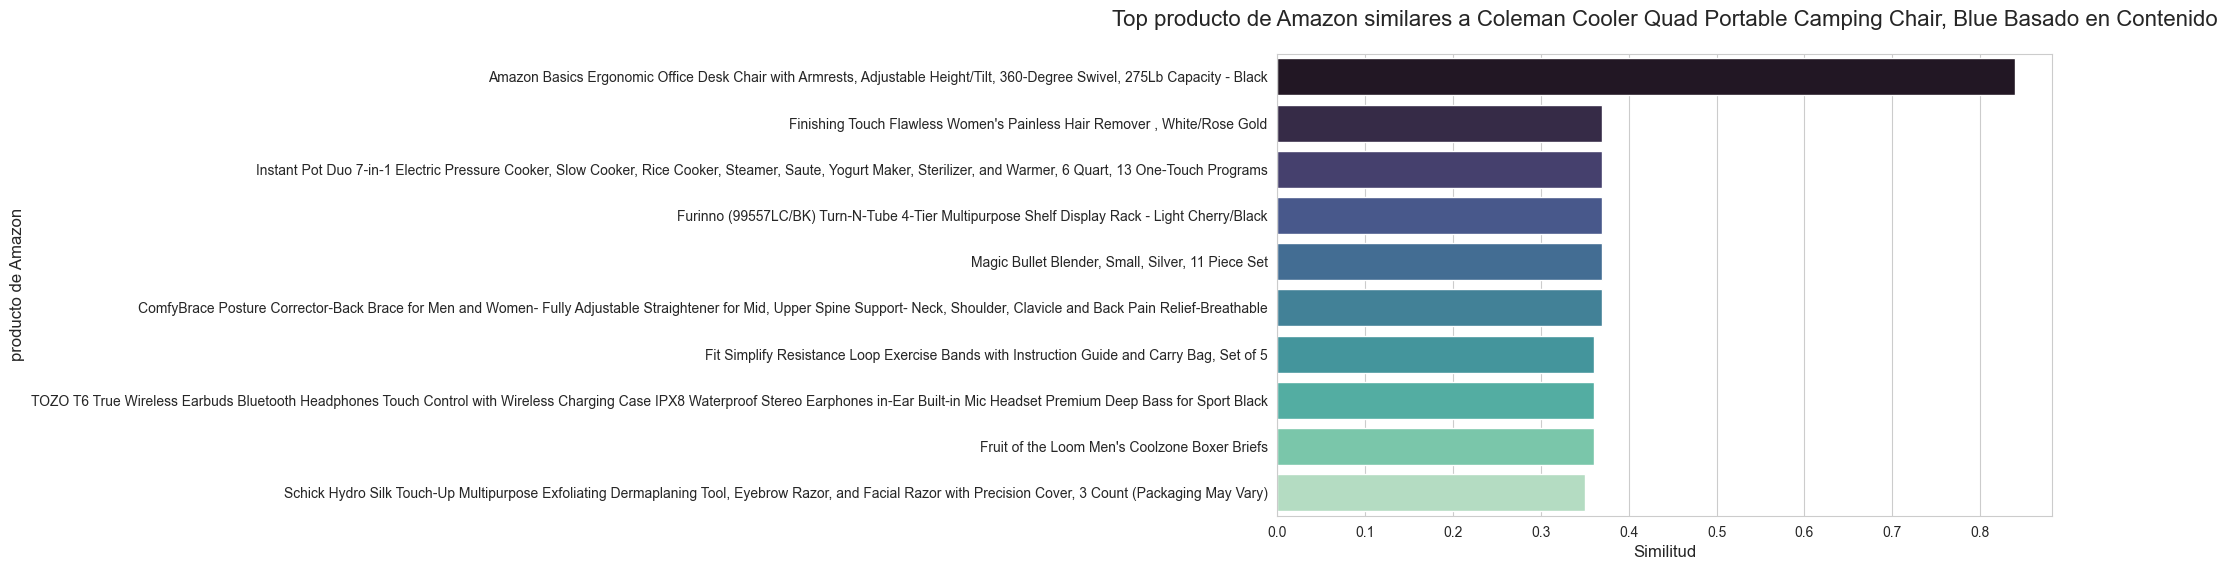

In [12]:
ss.recomendaciones_contenido(similarity, df_limpio, "productName")